# Linear SVM

We will be using below formulation for linear SVM.

## GOAL

- Use graadient descent to get the best separating line
- Make interactive demo


In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
x = np.array([[1, 12], [1.5, 11],
              [2, 13], [2.5, 12],
              [3, 15], [3.5, 14],
              [4, 13], [4.5, 2],
              [3, 6], [1.5, 14],
              [4, 7], [2.5, 3.5],
              [5, 9], [3.5, 6],
              [6, 7], [4.5, 3]]) 
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

In [3]:
def get_loss_gradient(x, y_actual, y_pred, w, b, alpha):
  """
  calculate gradient with respect to w and intercept b.
  return loss, gradient value wrt w and b
  """
  N = len(y)
  z = y*y_pred

  dL_by_dw = -2/N*(np.maximum(0, 1-z).dot(
        y[:, None]*x)) + 2 * alpha * w

  lb = (-2/N)*(y_actual*(1-z))
  lb[z >=1 ] = 0
  dL_by_db = np.sum(lb)

  total_loss = (1/N) * (np.sum( (np.maximum(0, 1-z)**2) ))+ alpha * np.linalg.norm(w)**2
  return total_loss, dL_by_dw, dL_by_db

In [4]:
def solve_linear_SVM(x, y, alpha=0.3, eta=0.01, epochs=10000, w_start=1, b_start=0, tolerance=1e-5):
  '''
  takes input x, output y and learning rate eta as input.
  gradient descent update is stopped when update is less than tolerance.
  gives best m and c.
  '''

  # Intialize slope and intercept
  if x.ndim == 1:
    x = x.reshape(x.shape[0],1)
    w = np.array([w_start])
  else:
    w = np.zeros(x.shape[-1]) + w_start
  b = b_start
  errors = [np.inf]
  w_array = [w]
  b_array = [b]
  continue_loop = True
  epoch = 0

  while epoch<epochs and continue_loop:
    y_pred = w.dot(x.T) + b   #positive value for category 1 and negative for -1
    L, dw, db = get_loss_gradient(x, y, y_pred, w, b, alpha)

    w = w - (eta*dw)
    b = b - (eta*db)

    w_array.append(w)
    b_array.append(b)
    errors.append(L)

    epoch += 1
    if errors[epoch-1] > errors[epoch]:
      continue_loop = (errors[epoch-1] - errors[epoch]) > tolerance

  metadata = np.array([errors[1:], w_array[:-1], b_array[:-1]])
  return metadata.T, w, b

In [105]:
from sklearn.datasets import make_classification
# x,y = make_classification(n_samples=40, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=2, class_sep=3, random_state=1995)
# y[y==0] = -1
print(x.shape, y.shape)
assert x.shape[0]==y.shape[0]

metadata_lmc, coef_, intercept_ = solve_linear_SVM(x, y, alpha=8, w_start=0, b_start=0, eta=0.001 ,epochs=10000, tolerance=1e-4)
print(f'coef_ = {coef_} \nintercept_term={intercept_}')
slope = -(coef_[0]/coef_[1])  # slope = -w1/w2
intercept = -(intercept_/coef_[1]) # b = -w0/w2
print(f'slope = {slope} \nintercept={intercept}')

(16, 2) (16,)
coef_ = [-0.0687601   0.03917976] 
intercept_term=-0.022592342598852084
slope = 1.7549905305477473 
intercept=0.5766330651217202


/home/mayur/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


[LibLinear]-0.15387698442667141 0.10026946413453722 [-0.4110172]


/home/mayur/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/mayur/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


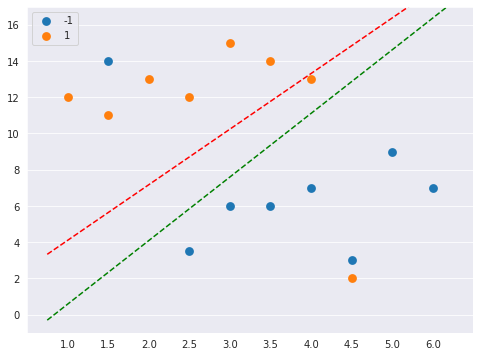

In [106]:
from sklearn.svm import LinearSVC
lr_model = LinearSVC(verbose=2, random_state=15)
lr_model.fit(x,y)
w1, w2 = lr_model.coef_[0,:]
w0 = lr_model.intercept_
print(w1, w2, w0)
sns.set_style('darkgrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.set_ylim(ymin=np.min(x)-2, ymax=np.max(x)+2)
sns.pointplot(x.T[0,:], x.T[1,:],hue=y, join=False, ax=ax1)
x_vals = np.array(ax1.get_xlim())
y_vals = -(w0/w2) - (w1/w2) * x_vals
plt.plot(x_vals, y_vals,'--', color='r')

y_vals_cust = intercept + slope * x_vals
plt.plot(x_vals, y_vals_cust,'--', color='g')


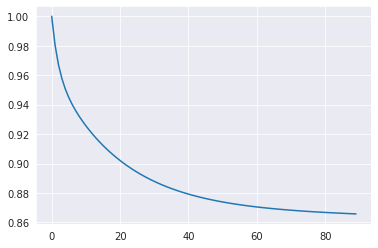

In [107]:
loss = metadata_lmc.T[0,:]
loss, weights_array, bias_array = metadata_lmc.T
epochs = list(range(len(loss)))
sns.lineplot(y=list(loss), x=epochs)
plt.show()